In [1]:
##########################
##                      ##
## Irving Gomez Mendez  ##
##   October 17, 2021   ##
##                      ##
##########################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from scipy.stats import multivariate_normal

([], [])

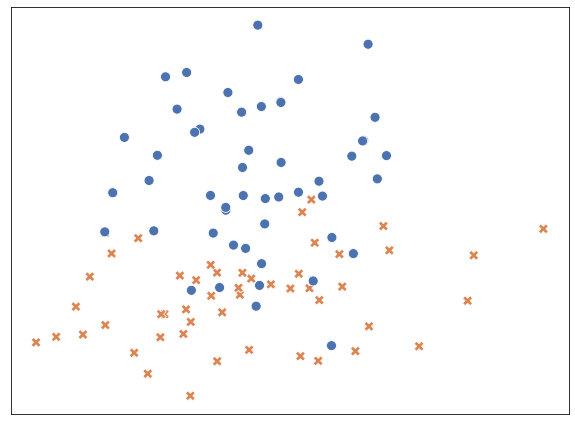

In [3]:
mu1 = [10, 5]
V1  = [[6, 0], [0, 2.5]]
n1 = 50
mu2 = [10, 10]
V2  = [[2.5, 0], [0, 6]]
n2 = 50

np.random.seed(seed = 159)
X1 = multivariate_normal.rvs(mean = mu1, cov = V1, size = n1)
X2 = multivariate_normal.rvs(mean = mu2, cov = V2, size = n2)

X1          = pd.DataFrame(X1)
X1.columns  = ['x', 'y']
X1['clase'] = 1

X2          = pd.DataFrame(X2)
X2.columns  = ['x', 'y']
X2['clase'] = -1

dat = pd.concat([X1, X2])

plt.figure(figsize=(10,7.5))
sns.scatterplot(data=dat, x='x', y='y', hue='clase', style='clase', s=100, palette="deep", legend=False)
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(dat[['x', 'y']], dat['clase'])

qda = QuadraticDiscriminantAnalysis()
qda.fit(dat[['x', 'y']], dat['clase'])

b0 = lda.intercept_[0]
w1 = lda.coef_[0][0]
w2 = lda.coef_[0][1]

xminmax = np.array([np.min(dat['x']), np.max(dat['x'])])
yminmax = np.array([np.min(dat['y']), np.max(dat['y'])])


xx, yy = np.meshgrid(np.linspace(xminmax[0]-1, xminmax[1]+1, 100), np.linspace(yminmax[0]-1, yminmax[1]+1, 100))
dat_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
dat_grid.columns = ['x', 'y']

Z = qda.predict_proba(dat_grid)
Z = Z[:, 1].reshape(xx.shape)
ylda = -(b0+(xminmax+[-1,1])*w1)/w2

([], [])

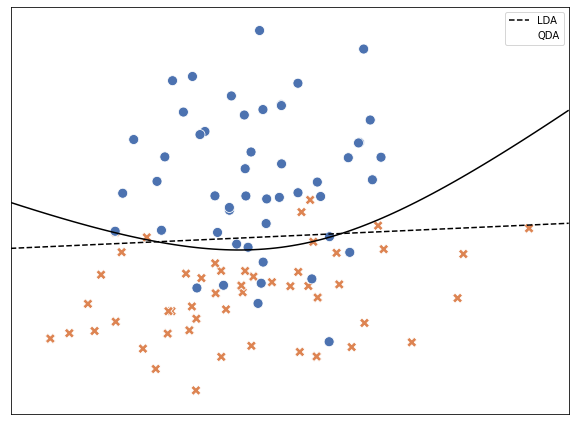

In [6]:
plt.figure(figsize=(10,7.5))
sns.scatterplot(data=dat, x='x', y='y', hue='clase', style='clase', s=100, palette="deep", legend=False)
plt.plot(xminmax+[-1,1], ylda, color='black', linestyle='--', label='LDA')
cs = plt.contour(xx, yy, Z, [0.5], colors='black')
cs.collections[0].set_label('QDA')
plt.ylim(yminmax[0]-1, yminmax[1]+1)
plt.xlim(xminmax[0]-1, xminmax[1]+1)
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])